In [ ]:
'''  With a k-means clustering model,Predictions are based on
1. The number cluster centers present (K)
2. Nearest Mean Values (measured in Euclidian distance between observations) '''

In [ ]:
# - Scale your variables
# - Analyse scatter plot or the data table to estimate number of centroids or cluster centers,
#    to set for the K parameter in the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams 
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [7]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_name = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [9]:
clustering = KMeans(n_clusters=3,random_state=5)

clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [11]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns = ['Targets']

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2] 5 [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]] 5


Text(0.5, 1.0, 'KMeans Classification')

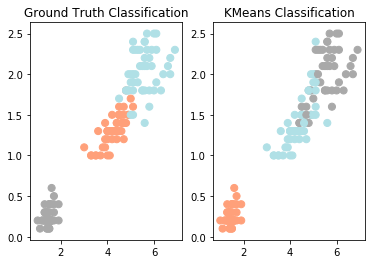

In [14]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[clustering.labels_],s=50)
print(clustering.labels_,clustering.n_iter_,clustering.cluster_centers_,clustering.n_iter_)
plt.title('KMeans Classification')


Text(0.5, 1.0, 'KMeans Classification')

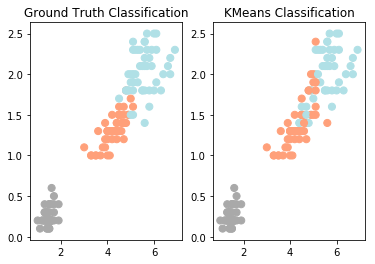

In [17]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[relabel],s=50)
plt.title('KMeans Classification')


In [19]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

   micro avg       0.83      0.83      0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



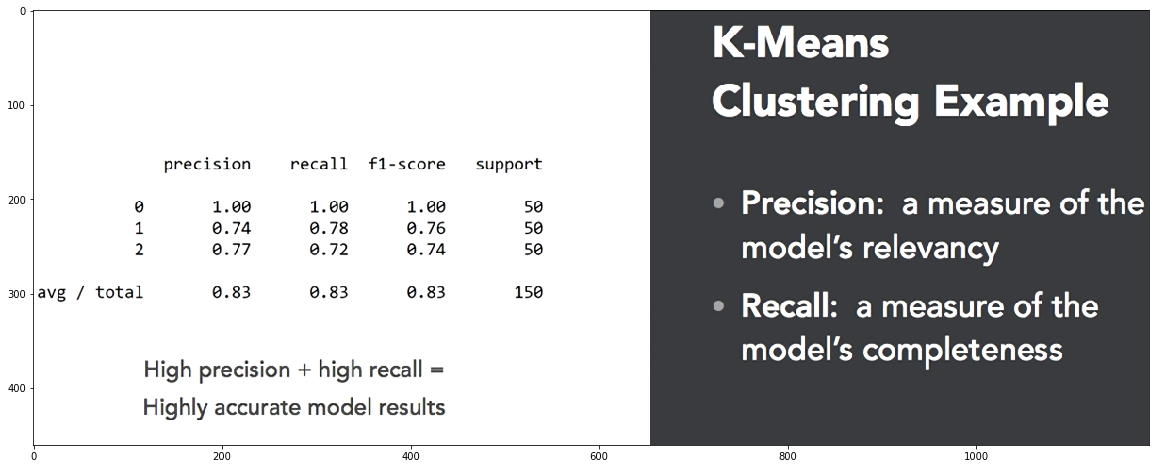

In [5]:
from IPython.display import Image,display

import matplotlib.image as mpimg
rcParams['figure.figsize'] = 20,8

image = mpimg.imread('C:/Users/Sujay/Workspace/CH03_Cluster_Analysis/kmeans.png')
implot =  plt.imshow(image)
plt.show()